In [56]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [4]:
train_df = pd.read_csv(Path('../Resources/Generator/2019loans.csv'))
test_df = pd.read_csv(Path('../Resources/Generator/2020Q1loans.csv'))

# Initial Prediction
We will be using both Logistic Regression and kNN (K Nearest Neighbors) to make predictions on the credit risk for a loan type (whether it's a "high-risk" or "low-risk" loan).  Because of the type of data provided in the data set, I think that the kNN model will be a better prediction because we'll be using categorical data with defined categories, and because the range of numeric values will most likely fall within certain bucket ranges, making it better for prediction using natural clustering based on similar characteristics.

In [22]:
#Review train data
train_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,target
0,7000.0,0.1894,256.38,MORTGAGE,75000.0,Not Verified,n,28.62,0.0,2.0,...,87.5,0.0,0.0,352260.0,62666.0,35000.0,10000.0,N,N,low_risk
1,40000.0,0.1614,975.71,MORTGAGE,102000.0,Source Verified,n,11.72,2.0,0.0,...,0.0,0.0,0.0,294664.0,109911.0,9000.0,71044.0,N,N,low_risk
2,11000.0,0.2055,294.81,RENT,45000.0,Verified,n,37.25,1.0,3.0,...,7.7,0.0,0.0,92228.0,36007.0,33000.0,46328.0,N,N,low_risk
3,4000.0,0.1612,140.87,MORTGAGE,38000.0,Not Verified,n,42.89,1.0,0.0,...,100.0,0.0,0.0,284273.0,52236.0,13500.0,52017.0,N,N,low_risk
4,14000.0,0.1797,505.93,MORTGAGE,43000.0,Source Verified,n,22.16,1.0,0.0,...,25.0,0.0,0.0,120280.0,88147.0,33300.0,78680.0,N,N,low_risk


In [23]:
print(train_df.shape)

(12180, 84)


In [26]:
#Check for nulls in train data
if train_df.isnull().sum().any() > 0:
    print(train_df.isnull.sum())
else:
    print("No nulls in train data")

No nulls in train data


In [24]:
#Review test data
test_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,target
0,40000.0,0.1033,856.40,RENT,128700.0,Source Verified,n,12.47,0.0,1.0,...,57.1,0.0,0.0,63915.0,49510.0,49400.0,14515.0,Y,N,low_risk
1,24450.0,0.1430,572.72,MORTGAGE,44574.0,Not Verified,n,15.05,0.0,1.0,...,0.0,0.0,0.0,136425.0,19439.0,15500.0,18925.0,N,N,low_risk
2,13500.0,0.1430,316.23,OWN,60000.0,Not Verified,n,28.72,0.0,0.0,...,0.0,0.0,0.0,82124.0,65000.0,5400.0,61724.0,Y,N,low_risk
3,10625.0,0.1774,268.31,RENT,60000.0,Verified,n,15.70,0.0,4.0,...,20.0,0.0,0.0,54855.0,50335.0,23200.0,26255.0,N,N,low_risk
4,6375.0,0.1862,232.46,RENT,60000.0,Source Verified,n,35.50,0.0,0.0,...,75.0,0.0,0.0,90445.0,56541.0,15300.0,72345.0,N,N,low_risk


In [25]:
print(train_df.shape)

(12180, 84)


In [21]:
#Check for nulls in test data
if train_df.isnull().sum().any() > 0:
    print(train_df.isnull.sum())
else:
    print("No nulls in test data")

No nulls in test data


In [32]:
# Convert categorical data to numeric and separate target feature for training data
train_dum_df = train_df.drop('target', axis=1)
train_dum_df = pd.get_dummies(train_dum_df)

In [33]:
train_dum_df.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,7000.0,0.1894,256.38,75000.0,28.62,0.0,2.0,20.0,0.0,40414.0,...,False,True,True,False,True,False,True,False,True,False
1,40000.0,0.1614,975.71,102000.0,11.72,2.0,0.0,10.0,0.0,43531.0,...,False,True,False,True,True,False,True,False,True,False
2,11000.0,0.2055,294.81,45000.0,37.25,1.0,3.0,23.0,0.0,8242.0,...,True,True,False,True,True,False,True,False,True,False
3,4000.0,0.1612,140.87,38000.0,42.89,1.0,0.0,7.0,0.0,12767.0,...,False,True,False,True,False,True,True,False,True,False
4,14000.0,0.1797,505.93,43000.0,22.16,1.0,0.0,22.0,0.0,11182.0,...,False,True,False,True,True,False,True,False,True,False


In [34]:
# Convert categorical data to numeric and separate target feature for testing data
test_dum_df = test_df.drop('target', axis=1)
test_dum_df = pd.get_dummies(test_dum_df)

test_dum_df.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,40000.0,0.1033,856.40,128700.0,12.47,0.0,1.0,8.0,0.0,38113.0,...,True,False,True,False,True,True,False,False,True,True
1,24450.0,0.1430,572.72,44574.0,15.05,0.0,1.0,6.0,0.0,1665.0,...,False,False,True,False,True,True,False,True,False,True
2,13500.0,0.1430,316.23,60000.0,28.72,0.0,0.0,8.0,0.0,13857.0,...,False,False,True,False,True,True,False,False,True,True
3,10625.0,0.1774,268.31,60000.0,15.70,0.0,4.0,17.0,0.0,6216.0,...,False,True,True,False,True,True,False,True,False,True
4,6375.0,0.1862,232.46,60000.0,35.50,0.0,0.0,13.0,0.0,12681.0,...,True,False,True,False,True,True,False,True,False,True


In [45]:
#Find missing dummy variable
train_cols = train_dum_df.columns.tolist()
test_cols = test_dum_df.columns.tolist()
missing = list(set(train_cols).difference(test_cols))

missing

['debt_settlement_flag_Y']

In [52]:
# add missing dummy variables to testing set
test_dum_df['debt_settlement_flag_Y'] = False

In [54]:
# Train the Logistic Regression model on the unscaled data and print the model score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

#Convert target label to 0 and 1
train_y_label = LabelEncoder().fit_transform(train_df['target'])
test_y_label = LabelEncoder().fit_transform(test_df['target'])

#Create logistic regression model (MODEL)
classifier = LogisticRegression()

#Fit the the model using training data
classifier.fit(train_dum_df,train_y_label)

print(f"Training Data Score: {classifier.score(train_dum_df, train_y_label)}")
print(f"Testing Data Score: {classifier.score(test_dum_df, test_y_label)}")

Training Data Score: 0.6542692939244663
Testing Data Score: 0.5095703955763505


/Users/micasamicaela/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


k: 1, Train/Test Score: 1.000/0.502
k: 3, Train/Test Score: 0.764/0.503
k: 5, Train/Test Score: 0.711/0.507
k: 7, Train/Test Score: 0.677/0.512
k: 9, Train/Test Score: 0.655/0.514
k: 11, Train/Test Score: 0.639/0.503
k: 13, Train/Test Score: 0.633/0.514
k: 15, Train/Test Score: 0.632/0.516
k: 17, Train/Test Score: 0.621/0.511
k: 19, Train/Test Score: 0.616/0.509


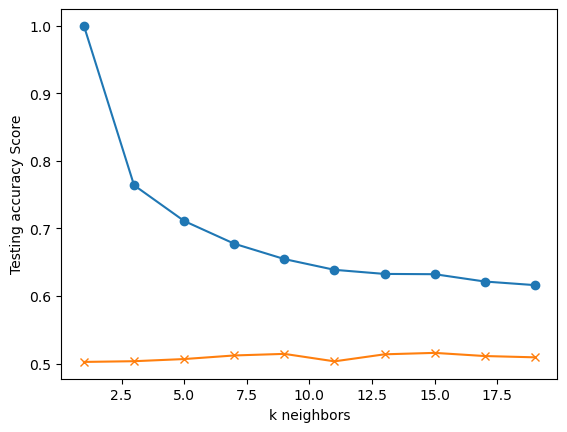

In [57]:
# Train a K-Nearest Neighbors model and print the model score
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_dum_df, train_y_label)
    train_score = knn.score(train_dum_df, train_y_label)
    test_score = knn.score(test_dum_df, test_y_label)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [64]:
#Based on the data above, there doesn't appear to be a standout number of clusters to use in the model.  However,
# 9 clusters appears to provide the highest test score where the train score begins to level off, so we will use that to fit the model.  
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(train_dum_df, train_y_label)
print('k=9 Test Acc: %.3f' % knn.score(test_dum_df, test_y_label))

k=9 Test Acc: 0.514


# Initial Modeling Results and Update Prediction
The initial logistic regression and kNN models were nearly identical in their predictions of the test data (log regression resulted in an accuracy of 0.510 and kNN resulted in an accuracy of 0.514).  These models can most likely be improved upon by scaling the data, because there is both categorical data included in the data sets, and because the spread of data in the numeric data types is large (some columns contain percentages that are limited to values between 0 and 100, while others contain financial or loan information that can theoretically include numbers from 0 to infinity).

I think once the data is scaled that logistic regression will give us a better prediction in classifying the data into the two classes (high-risk vs low-risk) given the provided data set.  If the target included additional values (medium-risk, extremely-high-risk, etc.) then kNN would potentially be the better model.

In [59]:
# Scale and transform the data
from sklearn.preprocessing import StandardScaler

scaled_train = StandardScaler().fit(train_dum_df)

X_train_scaled = scaled_train.transform(train_dum_df)
X_test_scaled = scaled_train.transform(test_dum_df)

In [60]:
# Train the Logistic Regression model on the scaled data and print the model score

#Create logistic regression model (MODEL)
classifier_scaled = LogisticRegression()

#Fit the the model using training data (FIT)
classifier_scaled.fit(X_train_scaled,train_y_label)

print(f"Training Data Score: {classifier_scaled.score(X_train_scaled, train_y_label)}")
print(f"Testing Data Score: {classifier_scaled.score(X_test_scaled, test_y_label)}")

Training Data Score: 0.710919540229885
Testing Data Score: 0.7598894087622289


/Users/micasamicaela/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


k: 1, Train/Test Score: 1.000/0.525
k: 3, Train/Test Score: 0.787/0.543
k: 5, Train/Test Score: 0.737/0.553
k: 7, Train/Test Score: 0.711/0.561
k: 9, Train/Test Score: 0.705/0.571
k: 11, Train/Test Score: 0.696/0.569
k: 13, Train/Test Score: 0.689/0.576
k: 15, Train/Test Score: 0.679/0.575
k: 17, Train/Test Score: 0.678/0.570
k: 19, Train/Test Score: 0.671/0.578


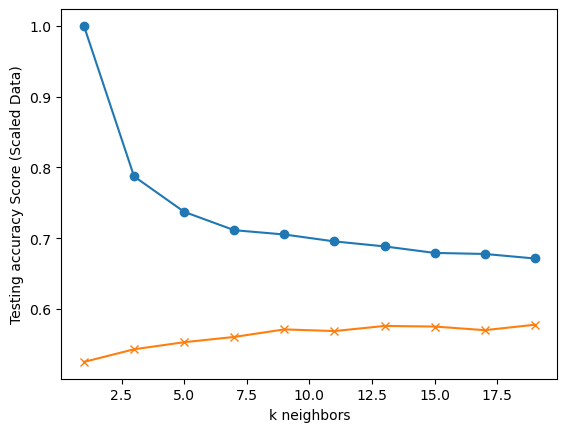

In [63]:
# Train a K-Nearest Neighbors model on the scaled data and print the model score

# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
scaled_train_scores = []
scaled_test_scores = []
for k in range(1, 20, 2):
    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, train_y_label)
    scaled_train_score = knn_scaled.score(X_train_scaled, train_y_label)
    scaled_test_score = knn_scaled.score(X_test_scaled, test_y_label)
    scaled_train_scores.append(scaled_train_score)
    scaled_test_scores.append(scaled_test_score)
    print(f"k: {k}, Train/Test Score: {scaled_train_score:.3f}/{scaled_test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), scaled_train_scores, marker='o')
plt.plot(range(1, 20, 2), scaled_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score (Scaled Data)")
plt.show()

In [66]:
#Based on the data above, 9 clusters appears to be the best predictor for the scaled data before the accuracy starts levelling off, 
# so we will use 9 clusters for our predictor.  
knn_scaled = KNeighborsClassifier(n_neighbors=9)
knn_scaled.fit(X_train_scaled, train_y_label)
print('k=9 Test Acc: %.3f' % knn_scaled.score(X_test_scaled, test_y_label))

k=9 Test Acc: 0.571


In [74]:
#Compare logistic regression and KNN test (predictor) accuracy scores from scaled data
print('Logistic Regression Accuracy: %.3f' % classifier_scaled.score(X_test_scaled, test_y_label))
print('kNN Clustering Accuracy: %.3f' % knn_scaled.score(X_test_scaled, test_y_label))

Logistic Regression Accuracy: 0.760
kNN Clustering Accuracy: 0.571


In [75]:
#Confusion matrix of scaled data (logistic regression)
from sklearn.metrics import confusion_matrix

y_true = test_y_label
y_pred = classifier_scaled.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[1764,  587],
       [ 542, 1809]])

In [77]:
#False negative score
fn = (542)/(1764+542+587+1809)
fn

0.11527009783071034

# Conclusion
Based on the scaled data, Logistic Regression appears to be the better model to use to predict high-risk vs low-risk credit types with an accuracy score of 76%.  The false negative rate accounts for about 11.5% of the error, meaning that 1 out 9 loans in the model are being assigned a "low-risk" credit score when they should have been assigned a "high-risk" score.  